In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.optimizers import Adam

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('training_dataset_extracted.csv')

In [4]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data = data.drop(['Unnamed: 0'],axis=1)
# data = data.drop(['spec_bw'],axis=1)
# data = data.drop(['rmse'],axis=1)
# data = data.drop(['mfcc5'],axis=1)
data

,chroma_stft,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc6,mfcc7,mfcc8,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,raga
0,0.219217,781.181273,-544.61410,133.50848,-14.897910,-3.138058,8.524352,-3.840796,-4.271243,-3.880267,...,-4.324019,-3.064337,-0.173097,-2.642961,-7.336475,-4.523596,-1.812121,-0.406697,0.983843,Asavari
1,0.219217,781.181273,-544.61410,133.50848,-14.897910,-3.138058,8.524352,-3.840796,-4.271243,-3.880267,...,-4.324019,-3.064337,-0.173097,-2.642961,-7.336475,-4.523596,-1.812121,-0.406697,0.983843,Asavari
2,0.273432,693.940429,-447.86322,213.16148,-14.130953,-11.331600,16.420635,-8.159338,-2.177950,-3.405420,...,-7.866261,-3.317495,0.862324,-5.182357,-13.791418,-11.215524,-7.578264,-3.676477,4.318786,Asavari
3,0.304646,824.111279,-405.13250,194.54865,-7.999970,-11.335129,11.941771,-14.010058,-1.374939,-5.704715,...,-10.788935,-0.739735,0.306327,0.957496,-15.129734,-9.618986,-10.683198,-5.401207,0.895577,Asavari
4,0.290848,880.768493,-347.25278,198.51637,-17.543112,-10.995949,6.318213,-13.578208,-6.294530,-6.166725,...,-16.896763,-0.786230,1.602909,1.507425,-14.511532,-5.472907,-12.691034,-10.648000,-1.635623,Asavari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,0.197611,957.670678,-259.71484,181.68414,-37.428925,11.704964,-5.442480,-27.158810,-13.361852,-12.197183,...,-1.620459,-3.486363,-5.096528,-9.026198,-7.543018,-3.400098,2.886043,2.538185,-1.341632,Yaman
26796,0.229712,1010.709888,-223.42990,177.24901,-46.214195,23.782782,-2.503562,-19.562601,-9.965001,-9.770401,...,-0.319671,-8.064866,-8.640186,-9.380874,-7.578934,-1.481572,0.907288,0.316269,-3.945298,Yaman
26797,0.256959,1062.893017,-220.36943,171.93712,-49.686775,42.106470,3.423998,-22.623566,-7.174815,-16.911257,...,-0.744639,-6.109853,-2.274239,-4.975880,-4.000562,0.029545,-2.193502,-5.134101,-6.878552,Yaman
26798,0.277346,810.408445,-263.29285,196.73975,-31.255220,27.152382,6.703676,-18.931074,-6.122109,-12.936074,...,-0.373385,-5.965020,-1.362160,-0.866191,-7.024756,-4.960011,-1.213281,-3.582214,-3.802976,Yaman


In [5]:
#Encoding the Feature labels
raga_list = data.iloc[:, -1]
encoder = LabelEncoder()
Y = encoder.fit_transform(raga_list)
#Scaling the Features
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [6]:
# Split the data into training (75%) and combined validation-test (25%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.25, random_state=42)

# Split the combined validation-test set into validation (50%) and test (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
from tensorflow.keras import models, layers, regularizers, optimizers
model1a = models.Sequential()
model1a.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model1a.add(layers.BatchNormalization())
model1a.add(layers.Dropout(0.5))
model1a.add(layers.Dense(256, activation='relu'))
model1a.add(layers.BatchNormalization())
model1a.add(layers.Dropout(0.5))
model1a.add(layers.Dense(128, activation='relu'))
model1a.add(layers.BatchNormalization())
model1a.add(layers.Dropout(0.5))
model1a.add(layers.Dense(64, activation='relu'))
model1a.add(layers.BatchNormalization())
model1a.add(layers.Dropout(0.5))
model1a.add(layers.Dense(32, activation='softmax'))

# Compile the model
model1a.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
classifier1a = model1a.fit(X_train, y_train,batch_size=128, epochs=200, validation_data=(X_val,y_val))


Epoch 1/200
158/158 [==============================] - 3s 8ms/step - loss: 3.5158 - accuracy: 0.1335 - val_loss: 2.5457 - val_accuracy: 0.2531
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 2.4835 - accuracy: 0.2663 - val_loss: 1.8651 - val_accuracy: 0.3955
Epoch 3/200
158/158 [==============================] - 1s 6ms/step - loss: 2.1074 - accuracy: 0.3086 - val_loss: 1.6068 - val_accuracy: 0.4884
Epoch 4/200
158/158 [==============================] - 1s 6ms/step - loss: 1.9244 - accuracy: 0.3386 - val_loss: 1.5072 - val_accuracy: 0.5134
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 1.8345 - accuracy: 0.3626 - val_loss: 1.4524 - val_accuracy: 0.5194
Epoch 6/200
158/158 [==============================] - 1s 7ms/step - loss: 1.7645 - accuracy: 0.3840 - val_loss: 1.3910 - val_accuracy: 0.5445
Epoch 7/200
158/158 [==============================] - 1s 9ms/step - loss: 1.7103 - accuracy: 0.4057 - val_loss: 1.3401 - val_accuracy: 0.5555

Epoch 58/200
158/158 [==============================] - 1s 7ms/step - loss: 0.9508 - accuracy: 0.6990 - val_loss: 0.5396 - val_accuracy: 0.8337
Epoch 59/200
158/158 [==============================] - 1s 7ms/step - loss: 0.9312 - accuracy: 0.7038 - val_loss: 0.5357 - val_accuracy: 0.8346
Epoch 60/200
158/158 [==============================] - 1s 8ms/step - loss: 0.9077 - accuracy: 0.7135 - val_loss: 0.5229 - val_accuracy: 0.8433
Epoch 61/200
158/158 [==============================] - 1s 8ms/step - loss: 0.9062 - accuracy: 0.7124 - val_loss: 0.5170 - val_accuracy: 0.8439
Epoch 62/200
158/158 [==============================] - 1s 8ms/step - loss: 0.9068 - accuracy: 0.7165 - val_loss: 0.5112 - val_accuracy: 0.8409
Epoch 63/200
158/158 [==============================] - 1s 7ms/step - loss: 0.8985 - accuracy: 0.7181 - val_loss: 0.5033 - val_accuracy: 0.8448
Epoch 64/200
158/158 [==============================] - 1s 7ms/step - loss: 0.8817 - accuracy: 0.7239 - val_loss: 0.5040 - val_accuracy:

Epoch 115/200
158/158 [==============================] - 1s 9ms/step - loss: 0.7501 - accuracy: 0.7691 - val_loss: 0.4050 - val_accuracy: 0.8767
Epoch 116/200
158/158 [==============================] - 1s 7ms/step - loss: 0.7559 - accuracy: 0.7616 - val_loss: 0.4110 - val_accuracy: 0.8734
Epoch 117/200
158/158 [==============================] - 1s 7ms/step - loss: 0.7488 - accuracy: 0.7661 - val_loss: 0.4178 - val_accuracy: 0.8672
Epoch 118/200
158/158 [==============================] - 1s 7ms/step - loss: 0.7346 - accuracy: 0.7691 - val_loss: 0.4060 - val_accuracy: 0.8743
Epoch 119/200
158/158 [==============================] - 1s 7ms/step - loss: 0.7410 - accuracy: 0.7665 - val_loss: 0.3984 - val_accuracy: 0.8773
Epoch 120/200
158/158 [==============================] - 1s 7ms/step - loss: 0.7315 - accuracy: 0.7737 - val_loss: 0.3967 - val_accuracy: 0.8773
Epoch 121/200
158/158 [==============================] - 1s 7ms/step - loss: 0.7224 - accuracy: 0.7750 - val_loss: 0.3968 - val_ac

158/158 [==============================] - 2s 11ms/step - loss: 0.6882 - accuracy: 0.7882 - val_loss: 0.3629 - val_accuracy: 0.8913
Epoch 172/200
158/158 [==============================] - 2s 12ms/step - loss: 0.6817 - accuracy: 0.7884 - val_loss: 0.3651 - val_accuracy: 0.8899
Epoch 173/200
158/158 [==============================] - 2s 10ms/step - loss: 0.6786 - accuracy: 0.7890 - val_loss: 0.3592 - val_accuracy: 0.8922
Epoch 174/200
158/158 [==============================] - 2s 11ms/step - loss: 0.6708 - accuracy: 0.7924 - val_loss: 0.3589 - val_accuracy: 0.8916
Epoch 175/200
158/158 [==============================] - 2s 12ms/step - loss: 0.6657 - accuracy: 0.7929 - val_loss: 0.3567 - val_accuracy: 0.8910
Epoch 176/200
158/158 [==============================] - 2s 11ms/step - loss: 0.6635 - accuracy: 0.7920 - val_loss: 0.3573 - val_accuracy: 0.8922
Epoch 177/200
158/158 [==============================] - 2s 11ms/step - loss: 0.6751 - accuracy: 0.7926 - val_loss: 0.3583 - val_accuracy:

In [9]:
from lime import lime_tabular

def predict_fn(x):
    return model1a.predict(x)  # Convert the output back to a NumPy array

# Create the LimeTabularExplainer using the predict_fn
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names=data.columns, class_names=['target'])

class ModelWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        # Assuming your model1 takes a tensor or array X as input
        # and returns the predicted output for that input
        return predict_fn(X)

# Create an instance of the ModelWrapper with your neural network model
model_wrapper = ModelWrapper(model1a)

# Explain the instance using the explainer and the model wrapper
explanation = explainer.explain_instance(X_test[0], model_wrapper.predict, num_features=23)

157/157 [==============================] - 1s 3ms/step


In [10]:
print("Explanation:")
print(explanation)

# Print the feature importances
print("Feature Importances:")
feature_importances = explanation.as_list()
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Explanation:
Feature Importances:
mfcc4 > 0.63: -0.0592385991872671
mfcc1 > 0.73: -0.04028577565552371
-0.67 < mfcc2 <= -0.04: 0.02129092544000172
mfcc11 <= -0.59: 0.020972873252860794
mfcc0 <= -0.47: 0.020197636985116726
0.05 < mfcc6 <= 0.65: -0.016898094006681814
spec_cent <= -0.75: -0.014487183919880667
0.04 < mfcc8 <= 0.66: 0.013973841859748778
chroma_stft <= -0.65: -0.01390438105216306
mfcc18 <= -0.58: 0.013835138931235587
mfcc17 <= -0.65: -0.012468522747357354
mfcc14 <= -0.63: 0.009187085772897905
mfcc16 <= -0.57: -0.008677772006147387
mfcc9 <= -0.55: 0.008245526165296125
-0.60 < mfcc3 <= 0.09: 0.0081089053952245
-0.63 < mfcc12 <= -0.08: -0.002377087532748628
mfcc15 <= -0.60: 0.0019357263321932482
-0.60 < mfcc10 <= -0.02: -0.0017806930048035192
-0.65 < mfcc13 <= -0.02: -0.001039881188094623
-0.57 < mfcc7 <= 0.05: -0.0002716925606257558


In [11]:
from sklearn.metrics import accuracy_score

# Calculate baseline accuracy
baseline_predictions = model1a.predict(X_test)
baseline_predictions = np.argmax(baseline_predictions, axis=1)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)

num_features = X_test.shape[1]

for i in range(num_features):
    # Remove one feature at a time and evaluate the model's accuracy
    X_ablated = np.copy(X_test)
    X_ablated[:, i] = 0  # Set the ith feature to zero
    ablated_predictions = model1a.predict(X_ablated)
    ablated_predictions = np.argmax(ablated_predictions, axis=1)
    ablated_accuracy = accuracy_score(y_test, ablated_predictions)
    feature_name = f"Feature_{i}"  # You can modify this to match your feature names
    print("Removed Feature:", feature_name)
    print("Ablated Accuracy:", ablated_accuracy)
    print("Accuracy Difference:", baseline_accuracy - ablated_accuracy)
    print()

105/105 [==============================] - 0s 3ms/step
Baseline Accuracy: 0.9020895522388059
105/105 [==============================] - 0s 3ms/step
Removed Feature: Feature_0
Ablated Accuracy: 0.8725373134328358
Accuracy Difference: 0.029552238805970132

105/105 [==============================] - 0s 3ms/step
Removed Feature: Feature_1
Ablated Accuracy: 0.7788059701492537
Accuracy Difference: 0.12328358208955226

105/105 [==============================] - 0s 3ms/step
Removed Feature: Feature_2
Ablated Accuracy: 0.7238805970149254
Accuracy Difference: 0.17820895522388058

105/105 [==============================] - 0s 3ms/step
Removed Feature: Feature_3
Ablated Accuracy: 0.7883582089552239
Accuracy Difference: 0.11373134328358203

105/105 [==============================] - 0s 3ms/step
Removed Feature: Feature_4
Ablated Accuracy: 0.7614925373134328
Accuracy Difference: 0.14059701492537313

105/105 [==============================] - 0s 3ms/step
Removed Feature: Feature_5
Ablated Accuracy: 0

In [12]:
# Obtain predictions for the validation data
y_pred1 = model1a.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred1, axis=1)

predicted_names = p1 = encoder.inverse_transform(y_pred_labels)
y_test_p = encoder.inverse_transform(y_test)

# Analyze correct prediction percentage for each raga
correct_predictions = predicted_names == y_test_p
correct_percentage = {}

for label in y_test_p:
    correct_percentage[label] = np.mean(correct_predictions[y_test_p == label]) * 100

# Print correct prediction percentage for each raga
print("\nCorrect Prediction Percentage:")
for label, percentage in correct_percentage.items():
    print(f"{label}: {percentage:.2f}%")

105/105 [==============================] - 0s 3ms/step

Correct Prediction Percentage:
Bhimpalasi: 92.04%
Pahadi: 91.68%
Bhairavi: 90.80%
Bageshree: 94.92%
Yaman: 86.32%
Asavari: 87.58%
Vrindavani Sarang: 100.00%
Bhoopali: 89.57%
Desh: 88.17%
Malkauns: 92.96%
Bhairav: 83.65%
Shuddha Sarang: 100.00%
Darbari: 100.00%
Madhuvanti: 100.00%


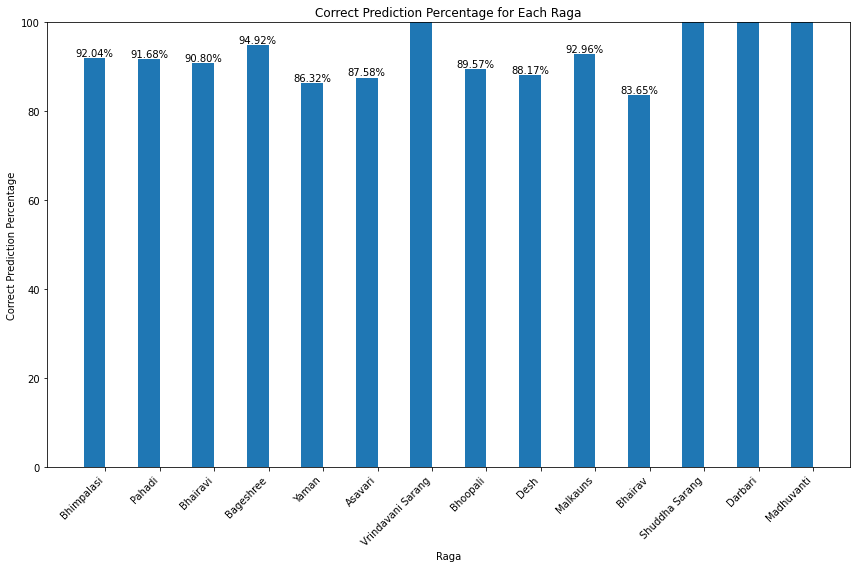

In [13]:
labels = list(correct_percentage.keys())
percentages = list(correct_percentage.values())

# Increase spacing between each raga bar graphs
bar_width = 0.4  # Adjust this value to control the width of the bars
spacing = 0.2    # Adjust this value to control the spacing between bars

plt.figure(figsize=(12,8))
bars = plt.bar(np.arange(len(labels)), percentages, width=bar_width)
plt.xlabel('Raga')
plt.ylabel('Correct Prediction Percentage')
plt.title('Correct Prediction Percentage for Each Raga')

# Adjust x-axis positions for better spacing
plt.xticks(np.arange(len(labels)) + (bar_width / 2), labels, rotation=45, ha='right', fontsize=10)

plt.ylim(0, 100)
plt.tight_layout()

# Adjust space between bars
plt.subplots_adjust(wspace=spacing)

# Adding data labels on top of the bars
for bar, percentage in zip(bars, percentages):
    if percentage < 100:  # Check if the percentage is less than 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%',
                 ha='center', va='bottom', fontsize=10, color='black')

plt.show()



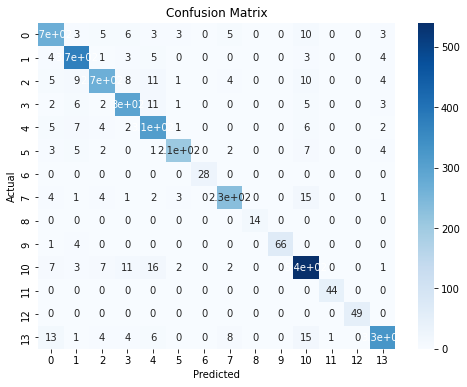

In [14]:
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_p, predicted_names)

# Create a colorful confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
p1 = encoder.inverse_transform(y_pred_labels )


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Calculate precision
precision = round(precision_score(y_test, y_pred_labels, average='weighted'), 4)

# Calculate recall
recall = round(recall_score(y_test, y_pred_labels, average='weighted'), 4)

# Calculate F1-score
f1 = round(f1_score(y_test, y_pred_labels, average='weighted'), 4)

# Calculate accuracy
accuracy = round(accuracy_score(y_test, y_pred_labels), 4)



# Print the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)


Precision: 0.9034
Recall: 0.9021
F1-score: 0.9021
Accuracy: 0.9021


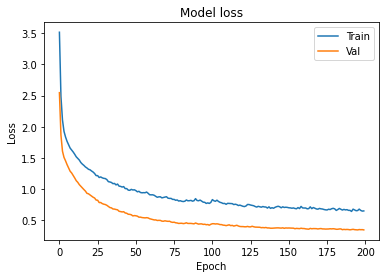

In [17]:

plt.plot(classifier1a.history['loss'])
plt.plot(classifier1a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


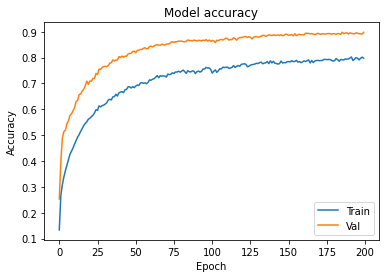

In [18]:

plt.plot(classifier1a.history['accuracy'])
plt.plot(classifier1a.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Reshape input data to match CNN input shape
input_shape = (X_train.shape[1], 1)  # Assuming X_train is a 2D array
X_train_reshaped = X_train.reshape(-1, X_train.shape[1], 1)
X_val_reshaped = X_val.reshape(-1, X_train.shape[1], 1)

# Create a new sequential model
model3b = Sequential()

# Add the first convolutional layer
model3b.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
model3b.add(layers.MaxPooling1D(pool_size=2))
model3b.add(layers.BatchNormalization())

# Add the second convolutional layer
model3b.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
model3b.add(layers.MaxPooling1D(pool_size=2))
model3b.add(layers.BatchNormalization())

# Flatten the output of the convolutional layers
model3b.add(layers.Flatten())

# Add the dense layers with dropout regularization
model3b.add(layers.Dense(512, activation='relu'))
model3b.add(layers.Dropout(0.5))
model3b.add(layers.Dense(256, activation='relu'))
model3b.add(layers.Dropout(0.5))
model3b.add(layers.Dense(128, activation='relu'))
model3b.add(layers.Dropout(0.5))
model3b.add(layers.Dense(32, activation='softmax'))

# Compile the model
model3b.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model3b.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 batch_normalization_4 (Batc  (None, 9, 64)            256       
 hNormalization)                                                 
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 128)            24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 128)           0         
 1D)                                                             
                                                      

In [20]:
classifier2b = model3b.fit(X_train_reshaped, y_train,batch_size=128, epochs=200, validation_data=(X_val_reshaped,y_val))

Epoch 1/200
158/158 [==============================] - 5s 23ms/step - loss: 2.4338 - accuracy: 0.2166 - val_loss: 2.3505 - val_accuracy: 0.3072
Epoch 2/200
158/158 [==============================] - 4s 23ms/step - loss: 1.8700 - accuracy: 0.3600 - val_loss: 1.7182 - val_accuracy: 0.4701
Epoch 3/200
158/158 [==============================] - 4s 24ms/step - loss: 1.5912 - accuracy: 0.4576 - val_loss: 1.3358 - val_accuracy: 0.6096
Epoch 4/200
158/158 [==============================] - 3s 20ms/step - loss: 1.4370 - accuracy: 0.5128 - val_loss: 1.1626 - val_accuracy: 0.6531
Epoch 5/200
158/158 [==============================] - 3s 20ms/step - loss: 1.3281 - accuracy: 0.5552 - val_loss: 1.0122 - val_accuracy: 0.6928
Epoch 6/200
158/158 [==============================] - 3s 16ms/step - loss: 1.1948 - accuracy: 0.6029 - val_loss: 0.9163 - val_accuracy: 0.7155
Epoch 7/200
158/158 [==============================] - 3s 17ms/step - loss: 1.1041 - accuracy: 0.6394 - val_loss: 0.8633 - val_accuracy:

158/158 [==============================] - 3s 16ms/step - loss: 0.2078 - accuracy: 0.9357 - val_loss: 0.3560 - val_accuracy: 0.9069
Epoch 58/200
158/158 [==============================] - 3s 16ms/step - loss: 0.2141 - accuracy: 0.9340 - val_loss: 0.3463 - val_accuracy: 0.9063
Epoch 59/200
158/158 [==============================] - 3s 16ms/step - loss: 0.2469 - accuracy: 0.9222 - val_loss: 0.3531 - val_accuracy: 0.9096
Epoch 60/200
158/158 [==============================] - 3s 16ms/step - loss: 0.2188 - accuracy: 0.9298 - val_loss: 0.3672 - val_accuracy: 0.9012
Epoch 61/200
158/158 [==============================] - 3s 17ms/step - loss: 0.2646 - accuracy: 0.9174 - val_loss: 0.3656 - val_accuracy: 0.9027
Epoch 62/200
158/158 [==============================] - 3s 16ms/step - loss: 0.2080 - accuracy: 0.9361 - val_loss: 0.3644 - val_accuracy: 0.9078
Epoch 63/200
158/158 [==============================] - 3s 16ms/step - loss: 0.2274 - accuracy: 0.9303 - val_loss: 0.3542 - val_accuracy: 0.908

158/158 [==============================] - 3s 17ms/step - loss: 0.2018 - accuracy: 0.9382 - val_loss: 0.3797 - val_accuracy: 0.9042
Epoch 114/200
158/158 [==============================] - 2s 16ms/step - loss: 0.1482 - accuracy: 0.9553 - val_loss: 0.3893 - val_accuracy: 0.9063
Epoch 115/200
158/158 [==============================] - 2s 16ms/step - loss: 0.1765 - accuracy: 0.9466 - val_loss: 0.3875 - val_accuracy: 0.9060
Epoch 116/200
158/158 [==============================] - 2s 16ms/step - loss: 0.1400 - accuracy: 0.9578 - val_loss: 0.3856 - val_accuracy: 0.9104
Epoch 117/200
158/158 [==============================] - 3s 16ms/step - loss: 0.1270 - accuracy: 0.9610 - val_loss: 0.3993 - val_accuracy: 0.9072
Epoch 118/200
158/158 [==============================] - 2s 16ms/step - loss: 0.1654 - accuracy: 0.9485 - val_loss: 0.4027 - val_accuracy: 0.9078
Epoch 119/200
158/158 [==============================] - 2s 16ms/step - loss: 0.1583 - accuracy: 0.9517 - val_loss: 0.4094 - val_accuracy:

158/158 [==============================] - 3s 17ms/step - loss: 0.0932 - accuracy: 0.9725 - val_loss: 0.3763 - val_accuracy: 0.9122
Epoch 170/200
158/158 [==============================] - 3s 17ms/step - loss: 0.0883 - accuracy: 0.9726 - val_loss: 0.4001 - val_accuracy: 0.9122
Epoch 171/200
158/158 [==============================] - 3s 17ms/step - loss: 0.1063 - accuracy: 0.9677 - val_loss: 0.4119 - val_accuracy: 0.9125
Epoch 172/200
158/158 [==============================] - 3s 17ms/step - loss: 0.0912 - accuracy: 0.9738 - val_loss: 0.4299 - val_accuracy: 0.9099
Epoch 173/200
158/158 [==============================] - 3s 16ms/step - loss: 0.0978 - accuracy: 0.9722 - val_loss: 0.4266 - val_accuracy: 0.9122
Epoch 174/200
158/158 [==============================] - 3s 16ms/step - loss: 0.1301 - accuracy: 0.9628 - val_loss: 0.4152 - val_accuracy: 0.9066
Epoch 175/200
158/158 [==============================] - 3s 16ms/step - loss: 0.1318 - accuracy: 0.9602 - val_loss: 0.3890 - val_accuracy:

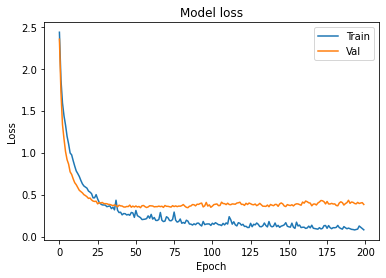

In [21]:
plt.plot(classifier2b.history['loss'])
plt.plot(classifier2b.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

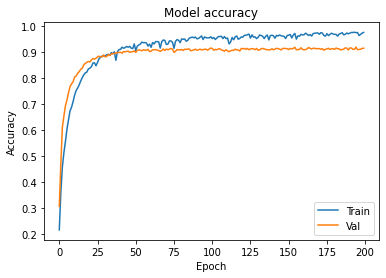

In [22]:
plt.plot(classifier2b.history['accuracy'])
plt.plot(classifier2b.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
# Obtain predictions for the validation data
y_pred2 = model3b.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred2_labels = np.argmax(y_pred2, axis=1)

predicted_names2 = p2 = encoder.inverse_transform(y_pred2_labels)
y_test_p = encoder.inverse_transform(y_test)

# Analyze correct prediction percentage for each raga
correct_predictions = predicted_names2 == y_test_p
correct_percentage = {}

for label in y_test_p:
    correct_percentage[label] = np.mean(correct_predictions[y_test_p == label]) * 100

# Print correct prediction percentage for each raga
print("\nCorrect Prediction Percentage:")
for label, percentage in correct_percentage.items():
    print(f"{label}: {percentage:.2f}%")

105/105 [==============================] - 1s 4ms/step

Correct Prediction Percentage:
Bhimpalasi: 90.86%
Pahadi: 91.17%
Bhairavi: 91.41%
Bageshree: 92.39%
Yaman: 88.42%
Asavari: 89.22%
Vrindavani Sarang: 97.96%
Bhoopali: 92.61%
Desh: 89.31%
Malkauns: 97.18%
Bhairav: 88.36%
Shuddha Sarang: 100.00%
Darbari: 100.00%
Madhuvanti: 100.00%


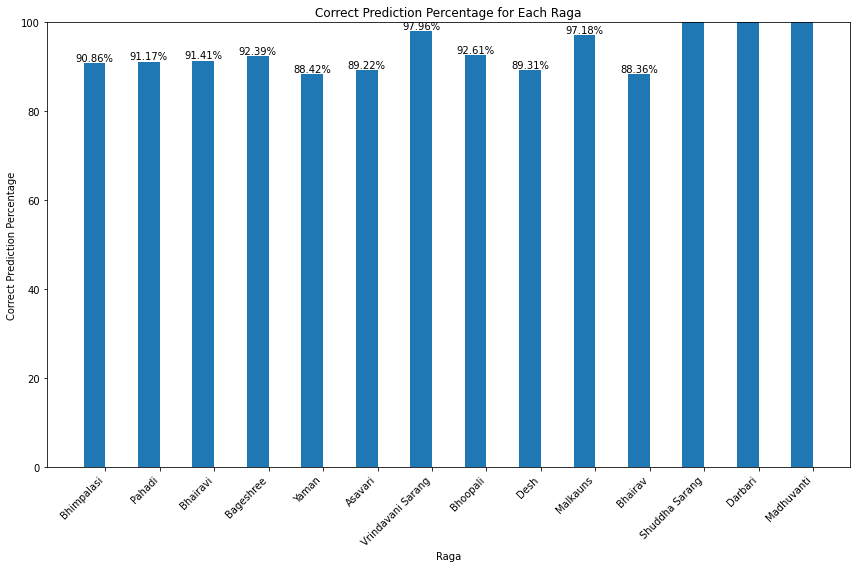

In [24]:
labels = list(correct_percentage.keys())
percentages = list(correct_percentage.values())

# Increase spacing between each raga bar graphs
bar_width = 0.4  # Adjust this value to control the width of the bars
spacing = 0.2    # Adjust this value to control the spacing between bars

plt.figure(figsize=(12,8))
bars = plt.bar(np.arange(len(labels)), percentages, width=bar_width)
plt.xlabel('Raga')
plt.ylabel('Correct Prediction Percentage')
plt.title('Correct Prediction Percentage for Each Raga')

# Adjust x-axis positions for better spacing
plt.xticks(np.arange(len(labels)) + (bar_width / 2), labels, rotation=45, ha='right', fontsize=10)

plt.ylim(0, 100)
plt.tight_layout()

# Adjust space between bars
plt.subplots_adjust(wspace=spacing)

# Adding data labels on top of the bars
for bar, percentage in zip(bars, percentages):
    if percentage < 100:  # Check if the percentage is less than 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%',
                 ha='center', va='bottom', fontsize=10, color='black')

plt.show()



In [25]:
# Obtain predictions for the validation data
y_pred2 = model3b.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred2_labels = np.argmax(y_pred2, axis=1)

p2 = encoder.inverse_transform(y_pred2_labels )


105/105 [==============================] - 0s 4ms/step


In [26]:
# Calculate precision
precision = round(precision_score(y_test, y_pred2_labels, average='weighted'), 4)

# Calculate recall
recall = round(recall_score(y_test, y_pred2_labels, average='weighted'), 4)

# Calculate F1-score
f1 = round(f1_score(y_test, y_pred2_labels, average='weighted'), 4)

# Calculate accuracy
accuracy = round(accuracy_score(y_test, y_pred2_labels), 4)



# Print the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

Precision: 0.9098
Recall: 0.9096
F1-score: 0.9096
Accuracy: 0.9096


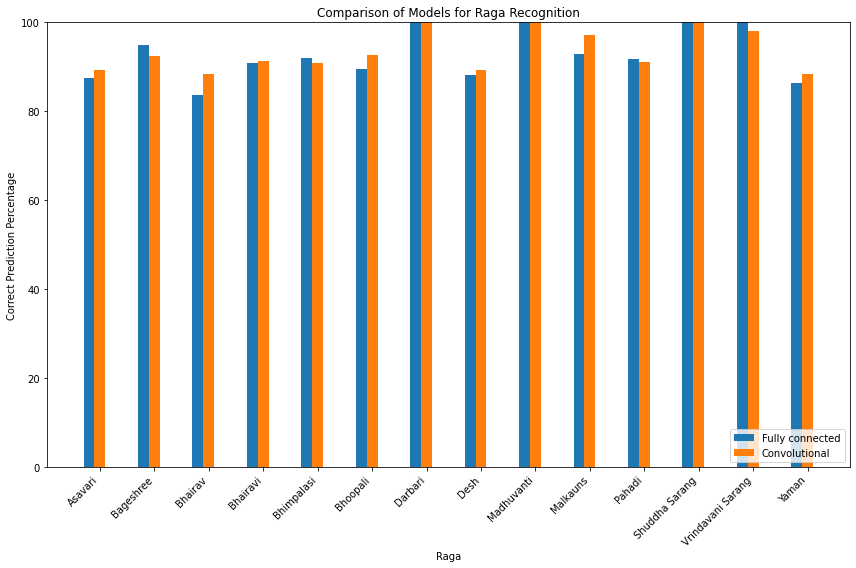

In [27]:
import numpy as np
import matplotlib.pyplot as plt


model_names = ["Fully connected", "Convolutional"]
correct_percentages = {}
for model_name, model_predictions in zip(model_names, [p1, p2]):
    correct_predictions = model_predictions == y_test_p
    correct_percentage = {}
    labels = np.unique(y_test_p)
    for label in labels:
        correct_percentage[label] = np.mean(correct_predictions[y_test_p == label]) * 100
    correct_percentages[model_name] = correct_percentage

plt.figure(figsize=(12, 8))
width = 0.2
x = np.arange(len(labels))

for i, model_name in enumerate(model_names):
    percentages = [correct_percentages[model_name][label] for label in labels]
    if percentage < 100:  
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%',
                 ha='center', va='bottom', fontsize=10, color='black')
    plt.bar(x + i * width, percentages, width, label=model_name)


plt.subplots_adjust(wspace=spacing)
plt.xlabel('Raga')
plt.ylabel('Correct Prediction Percentage')
plt.title('Comparison of Models for Raga Recognition')
plt.xticks(np.arange(len(labels)) + (bar_width / 2), labels, rotation=45, ha='right', fontsize=10)
plt.legend(loc='lower right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
